# SGD Classifier

In [1]:
import pickle
import numpy as np
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import stop_words
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

Using TensorFlow backend.


### Load data

In [2]:
df = pd.read_csv("../data/mixed_data_1200.csv", sep=';')
df = df.drop(["Unnamed: 0"],axis=1)
df.head(5)

,target,text
0,0,@Starrbby too bad I won't be around I lost my ...
1,0,amazon s3 plugin not worked in my website . it...
2,0,The Hoyts Distribution NZ website isn't workin...
3,0,dang won't be able to get to any workshops run...
4,0,Tried to install a Twitter-application on my p...


### Tokenize data

In [3]:
df.head(5)
#converts whitespaces
trb_nan_idx = df[pd.isnull(df['text'])].index.tolist()
df.loc[trb_nan_idx, 'text'] = ' '

### Split data into train/test set

In [4]:
X_load = df["text"]
Y_load = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X_load,Y_load,test_size=0.2,random_state=42,shuffle=True)

### Vectorize Data

In [5]:
count_vect = CountVectorizer(stop_words='english',ngram_range=(1, 1))
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
X_test_counts = count_vect.transform(X_test.values.astype('U'))
X_train_counts.shape

(2648, 5952)

### TF-IDF Data

In [6]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_train_tfidf.shape

(2648, 5952)

### Train model

In [7]:
svmClassifier =  SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
svmClassifier.fit(X_train_tfidf, y_train)

/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Predict
use the unlabled data

In [8]:
predictions = svmClassifier.predict(X_test_tfidf)

In [9]:
xxx = ["Today my PC crashed what a shit I can not work I am so stressed"]

In [10]:
xxx1 = count_vect.transform(xxx)
xxx2 = tfidf_transformer.transform(xxx1)
pred = svmClassifier.predict(xxx2)
print(pred)

[0]


### Evaluate

In [11]:
np.mean(predictions == y_test) #accuracy

0.9033232628398792

In [12]:
print(metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"]))
report = metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"],output_dict=True)
reportdf = pd.DataFrame(report).transpose()
#print(reportdf.to_latex())


               precision    recall  f1-score   support

techno-stress       0.96      0.98      0.97       259
      neutral       0.81      0.99      0.89       216
     positive       0.98      0.71      0.82       187

    micro avg       0.90      0.90      0.90       662
    macro avg       0.92      0.89      0.89       662
 weighted avg       0.92      0.90      0.90       662



#### Learning Curve

/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


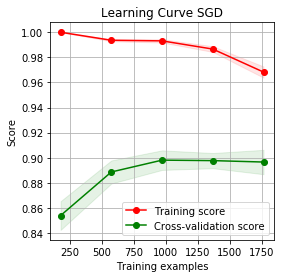

In [13]:
learn1 = skplt.estimators.plot_learning_curve(svmClassifier, X_train_tfidf, y_train,figsize=(4,4))
plt.title("Learning Curve SGD")
plt.show()

#### Confusion Matrix 

<Figure size 432x288 with 0 Axes>

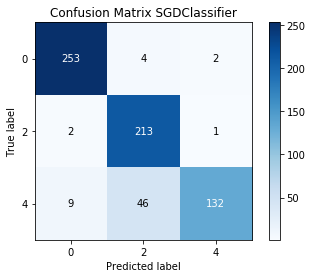

In [14]:
plt.figure()
skplt.metrics.plot_confusion_matrix(y_test,predictions,normalize=False)
plt.title("Confusion Matrix SGDClassifier")
plt.show()